# Pandas: A Complete Tutorial, Part 2

This is the second part of pandas, focusing on aggrgated, multi-variate analysis

7.  **Grouping and Aggregation**: Summarizing data with `groupby`.
8.  **Multi-indexing**: Working with complex, hierarchical data.
9.  **Merging, Joining, and Concatenating**: Combining different datasets.
10. **Visualization with Pandas**: Creating simple plots.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

titanic_df = sns.load_dataset('titanic')
vgsales_df = pd.read_csv('vgsales.csv')

## 7. Grouping and Aggregation 

The `groupby` operation is one of the most powerful features of Pandas. It allows you to split your data into groups based on some criteria, apply a function to each group independently, and then combine the results. This is the **Split-Apply-Combine** strategy.

In [2]:
titanic_df.mean(numeric_only=True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [ ]:
titanic_df['age'].median() # median, mode, mean, std

28.0

In [ ]:
titanic_df['age'].mode()

0    24.0
Name: age, dtype: float64

In [5]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic_df[(titanic_df['age']>18) & (titanic_df['alive']=='yes')]['embarked'].mode()

# Above age 18 and alive passengers' most common embarkation point

0    S
Name: embarked, dtype: object

In [11]:
titanic_df.groupby('sex')

# Grouping by 

In [12]:
titanic_df.groupby("sex").ngroups

2

In [14]:
titanic_df.groupby('sex').groups

{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}

In [15]:
# Get the first entry for each sex
titanic_df.groupby('sex').first()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
male,0,3,22.0,1,0,7.2500,S,Third,man,True,E,Southampton,no,False


In [16]:
a = titanic_df.groupby('sex')
a.get_group('female')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [18]:
# Let's find the average age of male and female passengers on the Titanic
titanic_df.groupby('sex')['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [19]:
titanic_df.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [20]:
# We can group by multiple columns. Let's find the survival rate by passenger class and gender.
# .mean() on the 'survived' column gives the survival rate because survived is 0 or 1.
titanic_df.groupby(['class', 'sex'])['survived'].count() # .unstack for pivot

C:\Users\evgen\AppData\Local\Temp\ipykernel_25168\2409583744.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby(['class', 'sex'])['survived'].count() # .unstack for pivot


class   sex   
First   female     94
        male      122
Second  female     76
        male      108
Third   female    144
        male      347
Name: survived, dtype: int64

In [22]:
titanic_df.groupby(['pclass', 'sex', 'survived'])['age'].mean()

pclass  sex     survived
1       female  0           25.666667
                1           34.939024
        male    0           44.581967
                1           36.248000
2       female  0           36.000000
                1           28.080882
        male    0           33.369048
                1           16.022000
3       female  0           23.818182
                1           19.329787
        male    0           27.255814
                1           22.274211
Name: age, dtype: float64

### Aggregation with `.agg()`
The `.agg()` method allows you to apply multiple aggregation functions at once.

In [23]:
titanic_df.groupby('class')['age'].mean()

C:\Users\evgen\AppData\Local\Temp\ipykernel_25168\4054155106.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby('class')['age'].mean()


class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [ ]:
titanic_df.groupby('class')['age'].max()

In [ ]:
titanic_df.groupby('class')['age'].std()

In [24]:
# For each passenger class, let's find the minimum, mean, and maximum fare paid.
titanic_df.groupby('class')['age'].agg(['min', 'mean', 'max'])

C:\Users\evgen\AppData\Local\Temp\ipykernel_25168\979611480.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby('class')['age'].agg(['min', 'mean', 'max'])


,min,mean,max
class,,,
First,0.92,38.233441,80.0
Second,0.67,29.877630,70.0
Third,0.42,25.140620,74.0


In [27]:
titanic_df.groupby(['class', 'sex'])['age'].agg(['min', 'mean', 'max'])

C:\Users\evgen\AppData\Local\Temp\ipykernel_25168\2799113121.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby(['class', 'sex'])['age'].agg(['min', 'mean', 'max'])


min       mean   max
class  sex                          
First  female  2.00  34.611765  63.0
       male    0.92  41.281386  80.0
Second female  2.00  28.722973  57.0
       male    0.67  30.740707  70.0
Third  female  0.75  21.750000  63.0
       male    0.42  26.507589  74.0

In [26]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
titanic_df.groupby("class").agg({'sex':'count','age':['mean','max']})

### Exercises: Grouping and Aggregation

**Question 1:** Using the `vgsales_df`, find the total `Global_Sales` for each `Publisher`. Which publisher has the highest total sales in our dataset?

**Question 2:** For each `Genre` in the `vgsales_df`, find the average sales in North America (`NA_Sales`) and Europe (`EU_Sales`).

---

## 8. Multi-indexing 📚

Multi-indexing, or hierarchical indexing, allows you to have multiple levels of index on an axis. It's a powerful way to work with higher-dimensional data in a 2D format.

`groupby` operation with multiple columns will result in a MultiIndex.

In [29]:
# Let's create a DataFrame with a MultiIndex
multi_index_df = titanic_df.groupby(['class', 'sex'])['survived'].mean()

multi_index_df

C:\Users\evgen\AppData\Local\Temp\ipykernel_25168\1629908862.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multi_index_df = titanic_df.groupby(['class', 'sex'])['survived'].mean()


class   sex   
First   female    0.968085
        male      0.368852
Second  female    0.921053
        male      0.157407
Third   female    0.500000
        male      0.135447
Name: survived, dtype: float64

In [ ]:
print("\nIndex object:", multi_index_df.index)

### Indexing with a Multi-index

You can select data from different levels of the index.

In [30]:
# Select all data for 'First' class
multi_index_df.loc['Third']

sex
female    0.500000
male      0.135447
Name: survived, dtype: float64

In [31]:
multi_index_df.loc[:, 'female']

class
First     0.968085
Second    0.921053
Third     0.500000
Name: survived, dtype: float64

In [32]:
# Select the specific value for ('First', 'female')
multi_index_df.loc[('First', 'female')]

np.float64(0.9680851063829787)

In [33]:
multi_index_df = titanic_df.groupby(['class', 'sex', 'embarked'])['survived'].mean()

C:\Users\evgen\AppData\Local\Temp\ipykernel_25168\3777689890.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multi_index_df = titanic_df.groupby(['class', 'sex', 'embarked'])['survived'].mean()


In [34]:
multi_index_df

class   sex     embarked
First   female  C           0.976744
                Q           1.000000
                S           0.958333
        male    C           0.404762
                Q           0.000000
                S           0.354430
Second  female  C           1.000000
                Q           1.000000
                S           0.910448
        male    C           0.200000
                Q           0.000000
                S           0.154639
Third   female  C           0.652174
                Q           0.727273
                S           0.375000
        male    C           0.232558
                Q           0.076923
                S           0.128302
Name: survived, dtype: float64

In [35]:
# multi_index_df[('First', 'female', 'C')]
# multi_index_df['First']['female']['C']
multi_index_df.loc['First']['female']['S']

np.float64(0.9583333333333334)

In [ ]:
multi_index_df.iloc[0]

In [ ]:
multi_index_df

In [ ]:
multi_index_df.unstack(level=2)

### Exercises: Multi-indexing

**Question 1:** Create a multi-indexed Series from `vgsales_df` that shows the total `Global_Sales` for each `Platform` and `Genre` combination. Then, select all the data for the 'Wii' platform.

---

## 9. Merging, Joining, and Concatenating 🔗

Pandas provides various facilities for easily combining together Series or DataFrame objects.

### Concatenating
`pd.concat()` stacks DataFrames on top of one another (axis=0) or side-by-side (axis=1).

In [ ]:
# Let's create two small DataFrames
df1 = pd.DataFrame({'A': ['A0', 'A1'], 'B': ['B0', 'B1']})
df2 = pd.DataFrame({'A': ['A2', 'A3'], 'B': ['B2', 'B3']})

pd.concat([df1, df2])

In [ ]:
pd.concat([df1, df2], axis=1)

### Merging & Joining
`pd.merge()` is the primary tool for SQL-style joins. Let's create two DataFrames to demonstrate.

In [ ]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'A': ['A0', 'A1', 'A2']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K3'], 'B': ['B0', 'B1', 'B3']})

print("Left DataFrame:")
print(left)
print("\nRight DataFrame:")
print(right)

In [ ]:
# Inner Join (default): Keeps only the keys that exist in BOTH DataFrames
pd.merge(left, right, on='key', how='inner')

In [ ]:
# Left Join: Keeps all keys from the left DataFrame
pd.merge(left, right, on='key', how='left')

In [ ]:
# Left Join: Keeps all keys from the left DataFrame
pd.merge(left, right, on='key', how='right')

In [ ]:
# Outer Join: Keeps all keys from BOTH DataFrames
pd.merge(left, right, on='key', how='outer')

### Exercises: Merging and Joining

**Question 1:** Create two DataFrames. The first should have game `Name` and `Genre`. The second should have game `Name` and `Publisher`. Merge them together into a single DataFrame that has `Name`, `Genre`, and `Publisher`.

---

---

## 10. Visualization with Pandas

Pandas has a built-in `.plot()` method that acts as a wrapper around the Matplotlib library. It allows you to create basic plots directly from your DataFrame.

<Axes: ylabel='Publisher'>

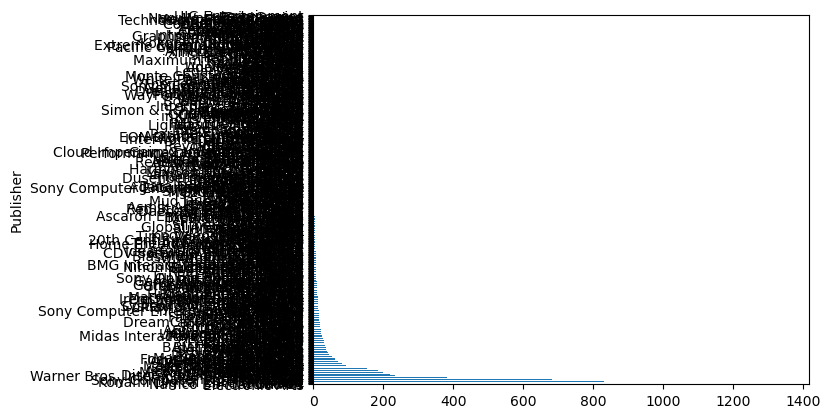

In [36]:
vgsales_df['Publisher'].value_counts().plot(kind='barh')

<Axes: ylabel='count'>

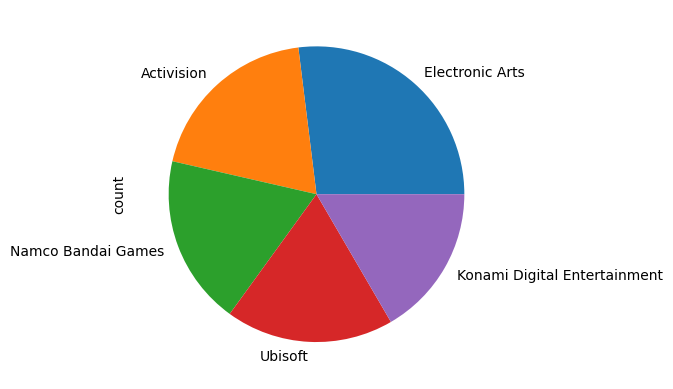

In [37]:
vgsales_df['Publisher'].value_counts()[0:5].plot(kind='pie')

In [38]:
vgsales_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

<Axes: xlabel='Genre'>

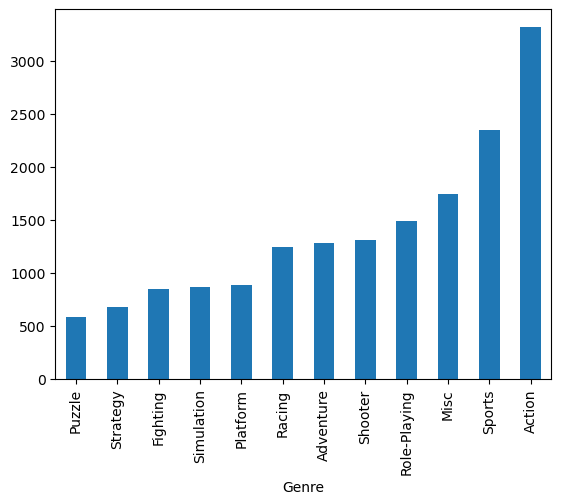

In [39]:
vgsales_df['Genre'].value_counts().sort_values().plot(kind='bar')

In [ ]:
vgsales_df.head()

In [ ]:
vgsales_df['Genre'].value_counts().nlargest(5).index

<Axes: xlabel='Genre', ylabel='Global_Sales'>

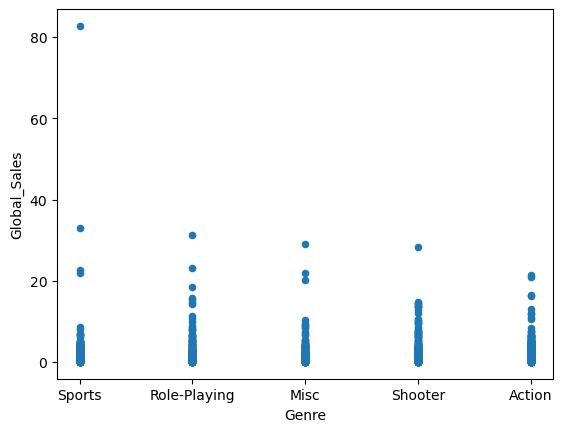

In [40]:
vgsales_df[vgsales_df['Genre'].isin(vgsales_df['Genre'].value_counts().nlargest(5).index)].plot(kind='scatter', x='Genre', y='Global_Sales')

In [ ]:
titanic_df[titanic_df["sex"]=="female"]['survived'].value_counts().plot(kind="bar")

In [ ]:
# Let's plot the number of games released per year
games_per_year = vgsales_df.groupby('Year').size()

games_per_year.plot(kind='line', figsize=(10, 5), title='Number of Games Released Per Year')

In [ ]:
games_per_year.plot(kind='bar', figsize=(10, 5), title='Number of Games Released Per Year')

In [ ]:
# Let's plot the total sales by genre
genre_sales = vgsales_df.groupby('Genre')['Global_Sales'].sum()

genre_sales.sort_values().plot(kind='barh', figsize=(10, 6), title='Total Global Sales by Genre')

In [ ]:
titanic_df.groupby(['sex', 'class'])['age'].mean().plot(kind='bar')

In [ ]:
titanic_df.groupby(['sex', 'class'])['age'].mean().unstack(level=0).plot(kind='bar')

In [ ]:
titanic_df.groupby(['sex', 'class'])['age'].mean().unstack(level=1).plot(kind='bar')

In [ ]:
vgsales_df.groupby(['Platform', 'Genre'])['Genre'].count()[0:50].unstack(level=0).plot(kind='bar')

In [ ]:
vgsales_df[['JP_Sales','NA_Sales']].head(100).plot(kind='scatter',x='JP_Sales',y='NA_Sales')